In [1]:
import re 
import pandas as pd 
import numpy as np
from tensorflow import keras 
import matplotlib.pyplot as plt
import seaborn as sns

#### Importo il dataset

In [2]:
dataset = pd.read_csv('labeled_data.csv')
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [3]:
nan_counts = dataset.isna().sum()
print(nan_counts)

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64


In [4]:
new_data = dataset

In [5]:
new_data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


#### Preprocessing e pulizia del dataset

In [6]:
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r'!', '', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r'RT @[^:]+:\s*', '', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r'@[^:]\s*', '', str(x)))
new_data['tweet']

0         As a woman you shouldn't complain about clean...
1         boy dats cold...tyga dwn bad for cuffin dat h...
2         You ever fuck a bitch and she start to cry? Y...
3                         iva_based she look like a tranny
4         The shit you hear about me might be true or i...
                               ...                        
24778    you's a muthaf***in lie &#8220;ifeAsKing: 0_Pe...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat.. dat nigguh like I aint ...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [7]:
new_data['tweet'][2475]

're_Ohh_Bee bitch see you then then bitch. And good luck to you.'

In [8]:
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r'&#[^:]+[0-9]\s*', '', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r'&#[^:]+[0-9]+;\s*', '', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r' lol \s*', '', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r' Lol \s*', '', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r'http://[^:]*', '', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r'//[^:]*', '', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r'#[^:]*', '', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r';[^:\s]*', '', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r'[^:\s]*:', '', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r"\'ve", ' have ', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r"\n't", ' not ', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r" u s ", ' american ', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r"'d", ' would ', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r"'ll", ' will ', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r"i'm", ' i am ', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r"e - mail", 'email', str(x)))
new_data.loc[:, 'tweet'] = new_data['tweet'].apply(lambda x: re.sub(r"\\", '', str(x)))

In [9]:
new_data['tweet'][4]

' The shit you hear about me might be true or it might be faker than the bitch who told it to ya '

In [10]:
new_data['tweet']

0         As a woman you shouldn't complain about clean...
1         boy dats cold...tyga dwn bad for cuffin dat h...
2         You ever fuck a bitch and she start to cry? Y...
3                         iva_based she look like a tranny
4         The shit you hear about me might be true or i...
                               ...                        
24778    you's a muthaf***in lie  0_Pearls orey_emanuel...
24779    you have  gone and broke the wrong heart baby,...
24780    young buck wanna eat.. dat nigguh like I aint ...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [11]:
conteggio_per_categoria = new_data['offensive_language'].value_counts()
conteggio_per_categoria_class = new_data['neither'].value_counts()
conteggio_per_categoria_hate = new_data['hate_speech'].value_counts()
conteggio_per_categoria_class = new_data['class'].value_counts()

#### Illustrazione delle Features

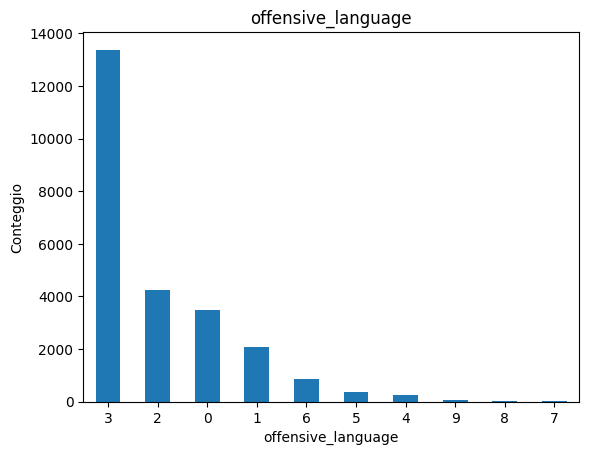

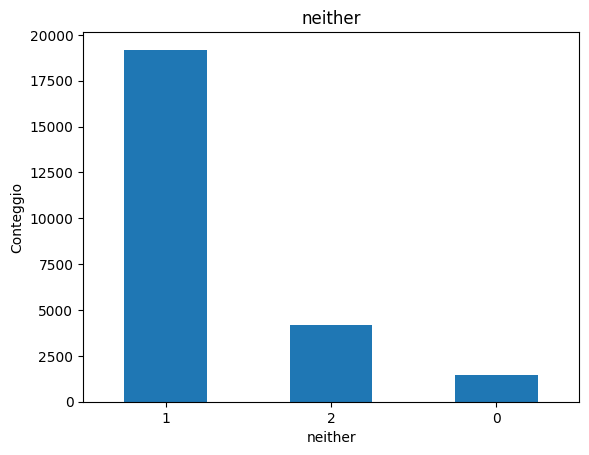

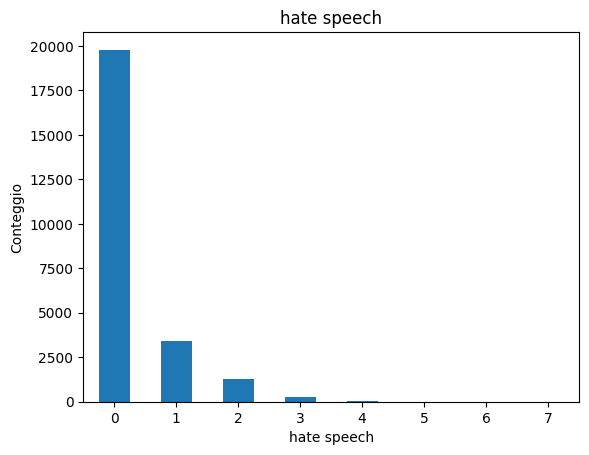

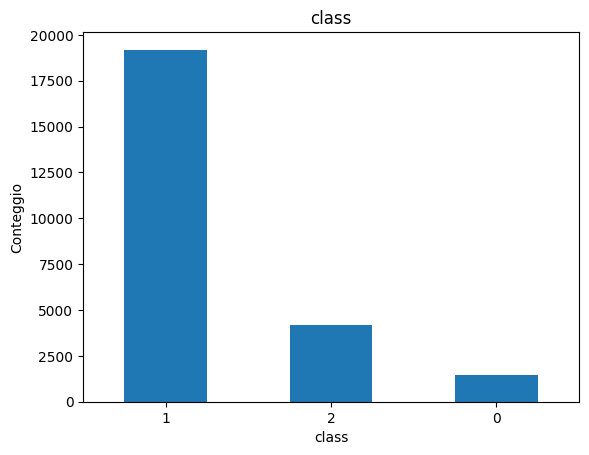

In [12]:
conteggio_per_categoria.plot(kind='bar')

plt.xlabel('offensive_language')
plt.ylabel('Conteggio')
plt.title('offensive_language')

plt.xticks(rotation=0)
plt.show()

conteggio_per_categoria_class.plot(kind='bar')

plt.xlabel('neither')
plt.ylabel('Conteggio')
plt.title('neither')

plt.xticks(rotation=0)

plt.show()

conteggio_per_categoria_hate.plot(kind='bar')

plt.xlabel('hate speech')
plt.ylabel('Conteggio')
plt.title('hate speech')

plt.xticks(rotation=0)

plt.show()

conteggio_per_categoria_class.plot(kind='bar')

plt.xlabel('class')
plt.ylabel('Conteggio')
plt.title('class')

plt.xticks(rotation=0)

plt.show()

#### Mappa di correlazione fra le features

In [13]:
matrix_corr = dataset.drop('tweet', axis = 1)

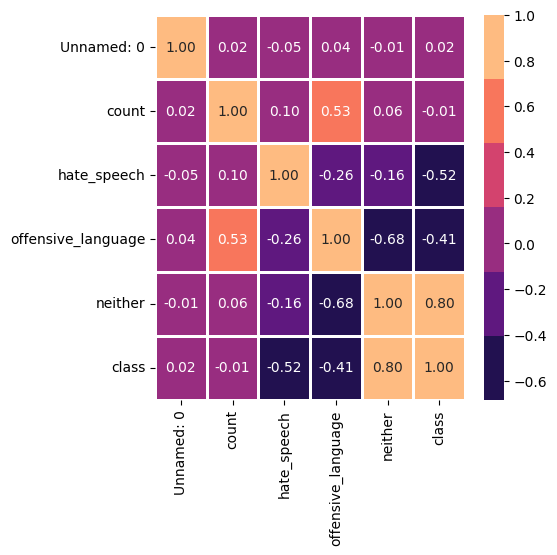

In [14]:
f, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(matrix_corr.corr(), ax=ax, annot=True, fmt=".2f", cmap=sns.color_palette("magma"), linewidths=1)

plt.show()

#### Illustrazione della lunghezza in parole della features tweet

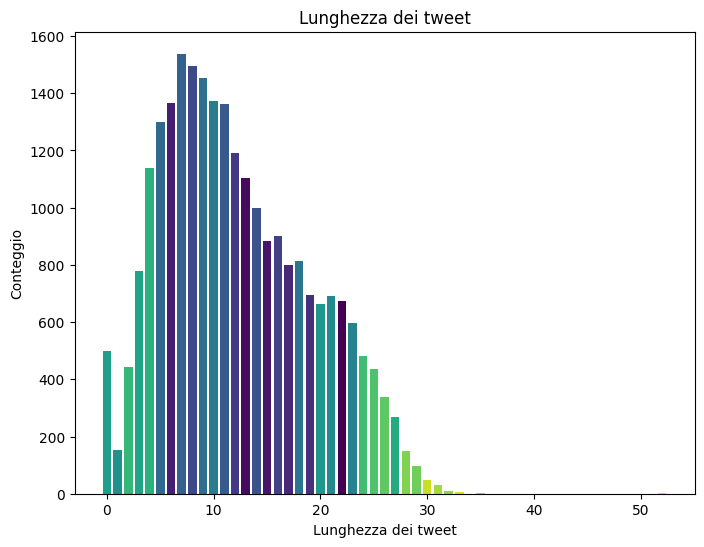

In [15]:
from collections import Counter
lunghezza = new_data['tweet'].values
lung = []
for l in lunghezza:
    l = str(l)
    l = l.split()
    l = len(l)
    lung.append(l)

new_lung = {
    'lunghezza': lung
}

lunghezza_counts = Counter(new_lung['lunghezza'])

labels = list(lunghezza_counts.keys())
values = list(lunghezza_counts.values())

colormap = plt.get_cmap('viridis')

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=[colormap(i / len(labels)) for i in range(len(labels))])
plt.xlabel("Lunghezza dei tweet")
plt.ylabel("Conteggio")
plt.title("Lunghezza dei tweet")
plt.show()

#### Lunghezza del dataset in parole

In [16]:
lunghezza_totale = sum(new_lung['lunghezza'])
print(r'Totale parole presenti nel Dataset', lunghezza_totale)

Totale parole presenti nel Dataset 303749


#### Illustrazione delle parole piu utilizzate nel dataset

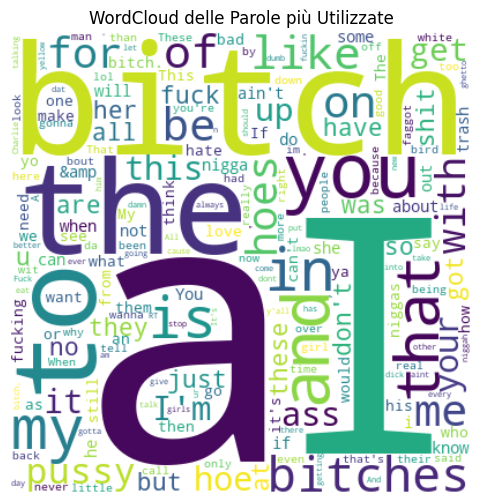

In [17]:
from wordcloud import WordCloud

parole_freq = []

for tweet in new_data['tweet']:
    parole = tweet.split()
    parole_freq.extend(parole) 

conteggio = Counter(parole_freq)

new_freq = pd.DataFrame({
    'parola': conteggio.keys(),
    'conteggio': conteggio.values()
})

parole = new_freq['parola']
conteggi = new_freq['conteggio']

conteggio_parole = {parola: conteggio for parola, conteggio in zip(parole, conteggi)}

wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(conteggio_parole)

# Visualizza il WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud delle Parole più Utilizzate")
plt.show()

#### Parole uniche presenti nel dataset

In [18]:
print(new_freq.value_counts())

parola        conteggio
"             207          1
lena57        1            1
lejdys        1            1
lementjetson  1            1
lemme         9            1
                          ..
ahahahha      1            1
ahahahhping   1            1
ahdyymahd     1            1
ahead         6            1
~~Ruffled     1            1
Name: count, Length: 39403, dtype: int64


In [19]:
x = new_data['tweet']
y = new_data['class'].values

#### Tokenizzazione delle x ('tweet') & categorizzazione y ('class')

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

num_max = 30000

tokenizer = Tokenizer(num_words=num_max, lower = True)

tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)

le = LabelEncoder()
y = le.fit_transform(y)
y = tf.keras.utils.to_categorical(y, num_classes=3)

print(x[:10])
print(y[:10])

[[74, 1, 383, 5, 1094, 1058, 54, 3279, 28, 27, 290, 58, 74, 1, 88, 5, 197, 154, 157, 4, 49, 53], [222, 1255, 555, 1619, 7041, 80, 21, 2405, 152, 23, 11, 4, 881, 532], [5, 173, 35, 1, 2, 7, 46, 275, 6, 608, 5, 18, 1028, 74, 43], [4413, 1301, 46, 99, 13, 1, 734], [4, 43, 5, 563, 54, 14, 322, 18, 537, 72, 22, 322, 18, 7042, 130, 4, 2, 73, 267, 22, 6, 93], [4, 43, 31, 3280, 14, 927, 5, 36, 1256, 7, 137, 21, 515, 33, 98, 75, 24, 17], [3, 64, 47, 31, 516, 28, 7, 94, 16, 247, 2, 3, 42, 90, 202, 43, 166, 16], [149, 26, 533, 15, 5, 191, 10, 517, 21, 240, 749, 161], [58, 5, 322, 47, 34, 93, 2, 104, 58, 283, 9], [4414, 3716, 1302, 7043, 2]]
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


#### Aggiungo il padding per rendere le righe tutte della stessa lunghezza

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x = [frase for frase in x]
x = pad_sequences(x, maxlen= 25)

print(x[:10])

[[   0    0    0   74    1  383    5 1094 1058   54 3279   28   27  290
    58   74    1   88    5  197  154  157    4   49   53]
 [   0    0    0    0    0    0    0    0    0    0    0  222 1255  555
  1619 7041   80   21 2405  152   23   11    4  881  532]
 [   0    0    0    0    0    0    0    0    0    0    5  173   35    1
     2    7   46  275    6  608    5   18 1028   74   43]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0 4413 1301   46   99   13    1  734]
 [   0    0    0    4   43    5  563   54   14  322   18  537   72   22
   322   18 7042  130    4    2   73  267   22    6   93]
 [   0    0    0    0    0    0    0    4   43   31 3280   14  927    5
    36 1256    7  137   21  515   33   98   75   24   17]
 [   0    0    0    0    0    0    0    3   64   47   31  516   28    7
    94   16  247    2    3   42   90  202   43  166   16]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0  149
    26  533   15  

#### Divido il dataset in test e train 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#### Utilizzo un Embedding preaddestrato un milioni di parole appositamente su twitter

In [23]:
embeddings_Glove = {}
testo = open('glove.twitter.27B.200d.txt', encoding = 'utf8')
for line in testo:
    values = line.split()
    word = values[0]
    coefs = np.array(values[1:], dtype = 'float32')
    embeddings_Glove[word] = coefs
testo.close()

embedding_matrix = np.zeros((num_max, 200))
for word, index in tokenizer.word_index.items():
    if index >= num_max:
        continue
    else:
        embedding_vector = embeddings_Glove.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [24]:
print(x.shape)

(24783, 25)


#### Architettura del modello e compilazione

In [25]:
from keras.layers import Input, Embedding, LSTM, Dropout, Dense
from keras.models import Model
from keras.initializers import Constant

input_layer = Input(shape=(x.shape[1],))
embedding = Embedding(input_dim = num_max, output_dim = 200, embeddings_initializer = Constant(embedding_matrix),
                      trainable= False)(input_layer)
LSTM1 = LSTM(units=128, return_sequences = False)(embedding)
dropout = Dropout(0.2)(LSTM1)
dense = Dense(units=64, activation='relu', kernel_initializer='uniform')(dropout)
output = Dense(units=3, activation='sigmoid', kernel_initializer='uniform')(dense)


model = Model(inputs = input_layer, outputs= output)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25)]              0         
                                                                 
 embedding (Embedding)       (None, 25, 200)           6000000   
                                                                 
 lstm (LSTM)                 (None, 128)               168448    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 6176899 (23.56 MB)
Trainable params: 176899 (69

#### Addestramento del modello 

In [26]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test)
                   , batch_size = 100, epochs = 10)

Epoch 1/10
199/199 [==============================] - 12s 46ms/step - loss: 0.3502 - accuracy: 0.7950 - val_loss: 0.2381 - val_accuracy: 0.8618
Epoch 2/10
199/199 [==============================] - 9s 44ms/step - loss: 0.2183 - accuracy: 0.8784 - val_loss: 0.2136 - val_accuracy: 0.8753
Epoch 3/10
199/199 [==============================] - 9s 44ms/step - loss: 0.1924 - accuracy: 0.8894 - val_loss: 0.1917 - val_accuracy: 0.8836
Epoch 4/10
199/199 [==============================] - 9s 44ms/step - loss: 0.1759 - accuracy: 0.8938 - val_loss: 0.1964 - val_accuracy: 0.8856
Epoch 5/10
199/199 [==============================] - 9s 44ms/step - loss: 0.1675 - accuracy: 0.9015 - val_loss: 0.1872 - val_accuracy: 0.8854
Epoch 6/10
199/199 [==============================] - 9s 44ms/step - loss: 0.1583 - accuracy: 0.9073 - val_loss: 0.1883 - val_accuracy: 0.8852
Epoch 7/10
199/199 [==============================] - 9s 44ms/step - loss: 0.1494 - accuracy: 0.9118 - val_loss: 0.1928 - val_accuracy: 0.887

#### Illustrazione dei risultati di addestramento 

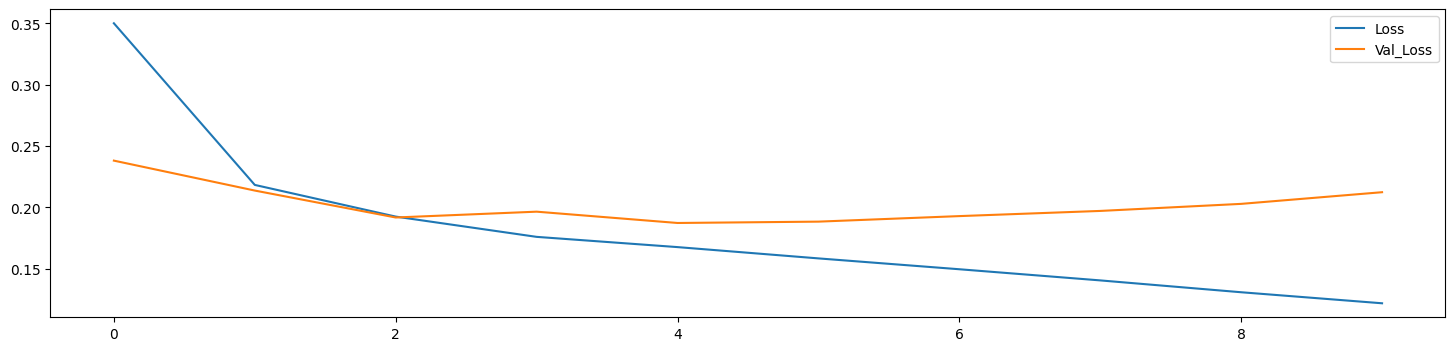

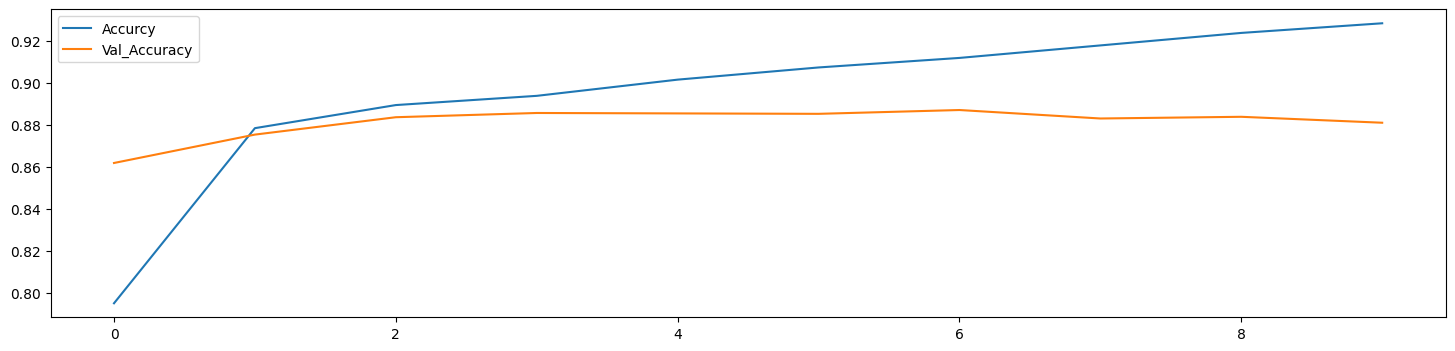

In [27]:
plt.figure(figsize=(18, 4))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history.history['accuracy'], label='Accurcy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.show()